In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
ed_exp = pd.read_csv("Resources/government-expenditure-on-education.csv")
ed_grad = pd.read_csv('Resources/EAG_GRAD_ENTR_RATES_06022021014126375.csv')
crm_prv = pd.read_csv('Resources/crime_prevelence-youth.csv')
crm_pers_held = pd.read_csv('Resources/crime_persons_held.csv')
crm_enter = pd.read_csv('Resources/crime_entering_prison.csv')

In [3]:
ed_exp

,Entity,Code,Year,"Government expenditure on education, total (% of GDP)"
0,Afghanistan,AFG,1971,1.160360
1,Afghanistan,AFG,1972,1.117180
2,Afghanistan,AFG,1973,1.427880
3,Afghanistan,AFG,1975,1.303320
4,Afghanistan,AFG,1979,1.739810
...,...,...,...,...
3608,Zimbabwe,ZWE,1994,44.333981
3609,Zimbabwe,ZWE,2010,1.833290
3610,Zimbabwe,ZWE,2012,7.294430
3611,Zimbabwe,ZWE,2013,7.408170


In [4]:
recent_ed_exp=ed_exp.loc[ed_exp["Year"]>=2012]
recent_ed_exp

,Entity,Code,Year,"Government expenditure on education, total (% of GDP)"
10,Afghanistan,AFG,2012,2.52441
11,Afghanistan,AFG,2013,3.47171
12,Afghanistan,AFG,2014,3.77759
13,Afghanistan,AFG,2015,3.24202
28,Albania,ALB,2013,3.53930
...,...,...,...,...
3562,Vietnam,VNM,2012,5.53329
3563,Vietnam,VNM,2013,5.65200
3610,Zimbabwe,ZWE,2012,7.29443
3611,Zimbabwe,ZWE,2013,7.40817


In [5]:
recent_ed_exp=recent_ed_exp.drop('Code', axis=1)
recent_ed_exp

,Entity,Year,"Government expenditure on education, total (% of GDP)"
10,Afghanistan,2012,2.52441
11,Afghanistan,2013,3.47171
12,Afghanistan,2014,3.77759
13,Afghanistan,2015,3.24202
28,Albania,2013,3.53930
...,...,...,...
3562,Vietnam,2012,5.53329
3563,Vietnam,2013,5.65200
3610,Zimbabwe,2012,7.29443
3611,Zimbabwe,2013,7.40817


In [6]:
ed_exp_mean=recent_ed_exp.groupby("Entity")["Government expenditure on education, total (% of GDP)"].mean()

In [7]:
ed_exp_mean=ed_exp_mean.reset_index()
ed_exp_mean

,Entity,"Government expenditure on education, total (% of GDP)"
0,Afghanistan,3.253932
1,Albania,3.496470
2,Andorra,2.991917
3,Argentina,5.504788
4,Armenia,2.645420
...,...,...
143,United Kingdom,5.647870
144,United States,5.042710
145,Vanuatu,5.230350
146,Vietnam,5.592645


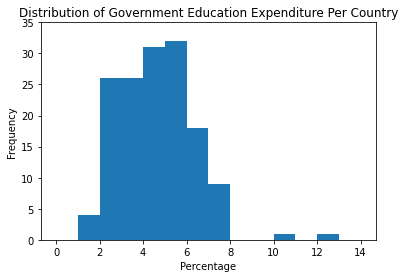

In [8]:
#OUR HISTOGRAM IS SAVING AS AN EMPTY PNG IMAGE IN OUR Output FOLDER!
ed_exp_mean['Government expenditure on education, total (% of GDP)'].plot(kind='hist',bins=list(range(15)))
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Government Education Expenditure Per Country')
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35])
#plt.show()
plt.savefig('Output/histogram_government_edu_exp.png')

In [9]:
top_exp = ed_exp_mean.sort_values(by='Government expenditure on education, total (% of GDP)',ascending=False)
top_20=top_exp.head(20)
top_20
top_20=top_20.set_index('Entity')
top_20

,"Government expenditure on education, total (% of GDP)"
Entity,
Micronesia (country),12.459500
Grenada,10.293130
Iceland,7.812940
Denmark,7.789033
Sweden,7.685060
Moldova,7.506797
Norway,7.506583
Zimbabwe,7.411093
Malta,7.217503


In [10]:
bottom_exp = ed_exp_mean.sort_values(by='Government expenditure on education, total (% of GDP)')
bottom_20=bottom_exp.head(20)
bottom_20=bottom_20.set_index('Entity')
bottom_20

,"Government expenditure on education, total (% of GDP)"
Entity,
Monaco,1.376853
South Sudan,1.560855
Bermuda,1.654863
Cambodia,1.828213
Guinea-Bissau,2.066775
Sri Lanka,2.154724
Myanmar,2.165700
Bangladesh,2.213993
Democratic Republic of Congo,2.267855


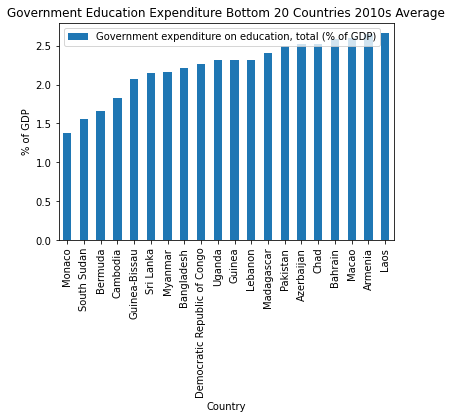

In [11]:
bottom_20.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('% of GDP')
plt.title('Government Education Expenditure Bottom 20 Countries 2010s Average')
plt.savefig("Output/bottom_20_expenditure.png")

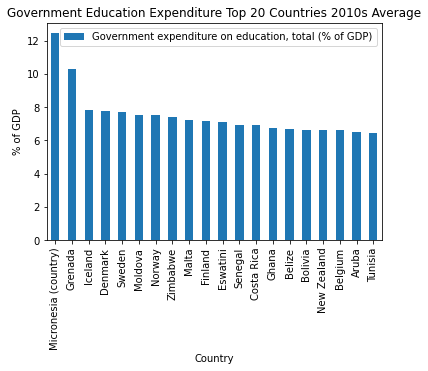

In [12]:
top_20.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('% of GDP')
plt.title('Government Education Expenditure Top 20 Countries 2010s Average')
plt.savefig("Output/top_20_expenditure.png")

In [13]:
ed_grad=ed_grad.drop(['COUNTRY', 'SEX','Age','AGE', 'COUNTRY_ORIGIN', 'International students exclusion', 'ISC11_LEVEL_CAT', 'INDICATOR', 'Indicator', 'YEAR', 'Flag Codes','Flags'], axis=1)
ed_grad

,Country,Gender,Education level and programe orientation,Year,Value
0,Denmark,Total,Total tertiary education (ISCED2011 levels 5 t...,2005,42.942
1,Denmark,Total,Total tertiary education (ISCED2011 levels 5 t...,2010,48.410
2,Denmark,Total,Total tertiary education (ISCED2011 levels 5 t...,2011,48.280
3,Denmark,Total,Total tertiary education (ISCED2011 levels 5 t...,2012,48.375
4,Denmark,Total,Total tertiary education (ISCED2011 levels 5 t...,2013,52.810
...,...,...,...,...,...
23421,Saudi Arabia,Women,Total tertiary education (ISCED2011 levels 5 t...,2012,NaN
23422,Saudi Arabia,Women,Total tertiary education (ISCED2011 levels 5 t...,2013,NaN
23423,Saudi Arabia,Women,Total tertiary education (ISCED2011 levels 5 t...,2014,NaN
23424,Saudi Arabia,Women,Total tertiary education (ISCED2011 levels 5 t...,2015,NaN
